In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [8]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

Ninguna celda vacía, todas tienen valor.

In [9]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [17]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

city_type

'Rural'

In [18]:
for city_type in (city_data_df["type"].unique()):
    print(city_type)

Urban
Suburban
Rural


In [20]:
# Get the number of data points from the Urban cities.
# Si lo ponemos así se visualiza unicamente una lista de verdadero y falso
city_data_df["type"]=="Urban"

0       True
1       True
2       True
3       True
4       True
       ...  
115    False
116    False
117    False
118    False
119    False
Name: type, Length: 120, dtype: bool

In [ ]:
# Ya luego hacemos la suma y así lo pone

In [23]:
sum(city_data_df["type"]=="Urban")

66

In [24]:
sum(city_data_df["type"]=="Suburban")


36

In [25]:
sum(city_data_df["type"]=="Rural")

18

# Merge data frames

In [28]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Cambio denombre de la columna
pyber_data_df.rename(columns = {'driver_count':'city_driver_count'}, inplace=True)
pyber_data_df.rename(columns = {'type':'city_type'}, inplace=True)

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,city_driver_count,city_type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


Se va a separar el data frame principal en varios para hacer el análisis de manera individual.

In [30]:
# Create the Urban city DataFrame.
# Se separan los Data frames por tipo de ciudad, para sacar los valores independientes.
# 1. Nombre del nuevo df
# 2. Data frame original
# 3. Luego la condicion que queremos que se cumpla

urban_cities_df = pyber_data_df[pyber_data_df["city_type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["city_type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["city_type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,city_driver_count,city_type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


# Conteo de viajes por tipo de ciudad y luego ciudad

· urban_ride_count

· suburban_ride_count

· rural_ride_count


In [31]:
# Get the number of rides for urban cities. Esto crea una Serie

urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [32]:
# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

# Tarifa promedio por ciudad en tipo "urbana"

In [33]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [34]:
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [62]:
urban_avg_fare_df = pd.DataFrame(urban_avg_fare)

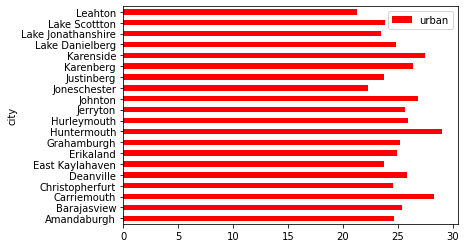

In [77]:
#Aquí estamos graficando las primeras 5 ciudades

urban_avg_fare.head(20).plot.barh(color='red', label= 'urban')
plt.legend()
plt.show()

In [78]:
# Ordena los valores de menor a mayor.
urban_avg_fare_df['fare'].sort_values(ascending=False)

city
Huntermouth            28.993750
Rodneyfort             28.616957
South Phillip          28.571290
Carriemouth            28.314444
West Patrickchester    28.233125
                         ...    
Raymondhaven           21.480400
Leahton                21.243810
Royland                20.570667
West Gabriel           20.346087
South Latoya           20.093158
Name: fare, Length: 66, dtype: float64

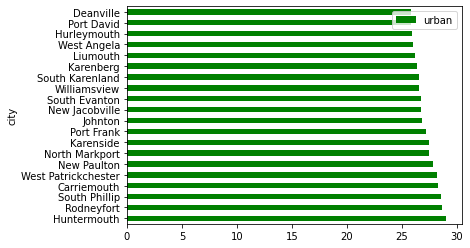

In [81]:
u_sorted = urban_avg_fare_df['fare'].sort_values(ascending=False)
u_sorted.head(20).plot.barh(color='green', label= 'urban')
plt.legend()
plt.show()

In [84]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["city_driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: city_driver_count, dtype: float64

In [86]:
# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["city_driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["city_driver_count"]

In [91]:
pyber_data_df.to_excel('pyber_data_df.xlsx')

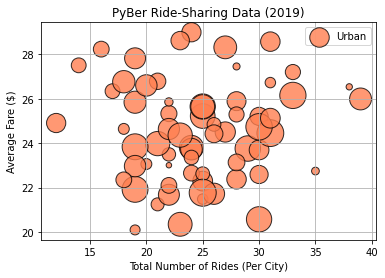

In [96]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

plt.show()

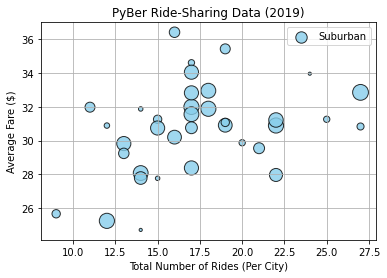

In [99]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

plt.show()

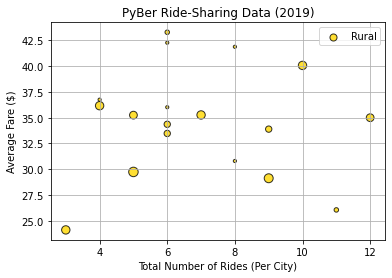

In [100]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

plt.show()

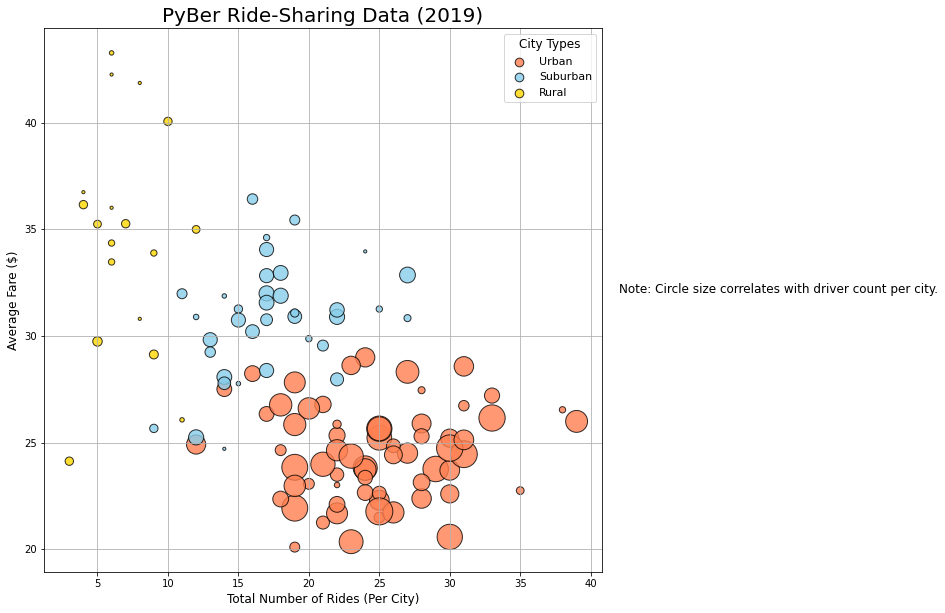

In [113]:
# Cambia el tamaño de la imagen
plt.subplots(figsize=(10, 10))

# Grafica la urban
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

# Grafica la suburban
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

# Grafica la rural
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)


# Create a legend
lgnd = plt.legend(fontsize="11", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 32, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Show the plot
plt.show()

In [114]:
# Get summary statistics.
urban_cities_df.describe()

,fare,ride_id,city_driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [117]:
# Get summary statistics.
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [118]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [120]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.median(),0), round(suburban_ride_count.median(),0), round(rural_ride_count.median(),0)

(24.0, 17.0, 6.0)

In [121]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mode(),0), round(suburban_ride_count.mode(),0), round(rural_ride_count.mode(),0)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [122]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [123]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")


The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [124]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).


In [125]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [156]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [157]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [158]:
# Get the fares for the suburban cities.
suburban_fares = suburban_cities_df["fare"]

# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [159]:
# Get the fares for the rural cities.
rural_fares = rural_cities_df["fare"]

# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


# City Fare Summary

In [160]:
avg_fare_summary = pd.DataFrame({
    'City_Type' : ['Urban', 'Suburban', 'Rural'],
    'Mean_Fare' : [mean_urban_fares, mean_suburban_fares, mean_rural_fares],
    'Median_Fare' : [median_urban_fares, median_suburban_fares, median_rural_fares],
    'Mode_Fare' : ['22.86 , [5]', '17.99, [3]', '37.05, [2]']
})

avg_fare_summary =avg_fare_summary.set_index('City_Type')
avg_fare_summary.sort_values('Mean_Fare',ascending=False, inplace=True)
avg_fare_summary

,Mean_Fare,Median_Fare,Mode_Fare
City_Type,,,
Rural,34.623440,37.05,"37.05, [2]"
Suburban,30.970128,30.75,"17.99, [3]"
Urban,24.525772,24.64,"22.86 , [5]"


# Drivers summary

In [171]:
urban_cities_df.head()

,city,date,fare,ride_id,city_driver_count,city_type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [174]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df.set_index(['city'])['city_driver_count']
urban_drivers.head()

city
Lake Jonathanshire     5
South Michelleport    72
Port Samanthamouth    57
Rodneyfort            34
South Jack            46
Name: city_driver_count, dtype: int64

In [175]:
# Get the count data from rural and suburban
suburban_drivers = suburban_cities_df.set_index(['city'])['city_driver_count']
rural_drivers = rural_cities_df.set_index(['city'])['city_driver_count']


In [183]:
urban_drivers.describe()

count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: city_driver_count, dtype: float64

In [184]:
suburban_drivers.describe()

count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: city_driver_count, dtype: float64

In [185]:
rural_drivers.describe()

count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: city_driver_count, dtype: float64

In [194]:
# Calculate central tendency measurments
mean_urban_drivers = np.mean(urban_drivers)
print(f"Mean urban: {mean_urban_drivers:.0f}")
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"Mean suburban: {mean_suburban_drivers:.0f}")
mean_rural_drivers = np.mean(rural_drivers)
print(f"Mean rural: {mean_rural_drivers:.0f}")

Mean urban: 37
Mean suburban: 14
Mean rural: 4


In [196]:
median_urban_drivers = np.median(urban_drivers)
print(f"median urban: {median_urban_drivers:.0f}")
median_suburban_drivers = np.median(suburban_drivers)
print(f"median suburban: {median_suburban_drivers:.0f}")
median_rural_drivers = np.median(rural_drivers)
print(f"median rural: {median_rural_drivers:.0f}")

median urban: 37
median suburban: 16
median rural: 4


In [197]:
mode_urban_drivers = sts.mode(urban_drivers)
print(f"mode urban: {mode_urban_drivers}")
mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"mode suburban: {mode_suburban_drivers}")
mode_rural_drivers = sts.mode(rural_drivers)
print(f"mode rural: {mode_rural_drivers}")

mode urban: ModeResult(mode=array([39]), count=array([86]))
mode suburban: ModeResult(mode=array([20]), count=array([79]))
mode rural: ModeResult(mode=array([1]), count=array([32]))


In [203]:
drivers_summary = pd.DataFrame({
    'City_Type' : ['Urban', 'Suburban', 'Rural'],
    'Mean_drivers' : [mean_urban_drivers, mean_suburban_drivers, mean_rural_drivers],
    'Median_drivers' : [median_urban_drivers, median_suburban_drivers, median_rural_drivers],
    'Mode_drivers' : ['39 , [86]', '20, [79]', '1, [32]']
})

drivers_summary = drivers_summary.set_index('City_Type')
drivers_summary.sort_values('Mean_drivers',ascending=False, inplace=True)
drivers_summary

,Mean_drivers,Median_drivers,Mode_drivers
City_Type,,,
Urban,36.678154,37.0,"39 , [86]"
Suburban,13.712000,16.0,"20, [79]"
Rural,4.296000,4.0,"1, [32]"


# Box and Whisker Plots for ride count data

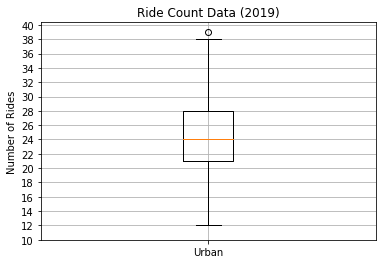

In [204]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()


In [205]:
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

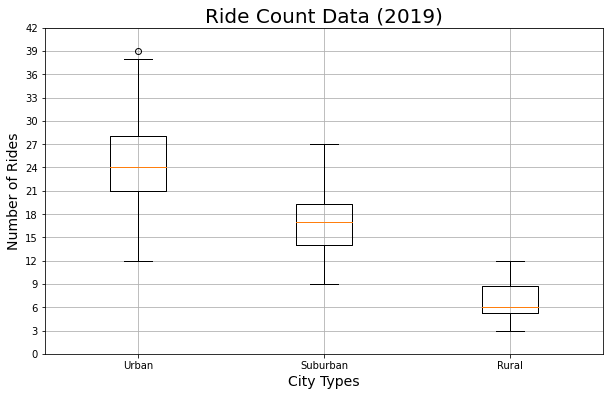

In [207]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

# Save the figure.
plt.savefig("Resources/Fig2.png")
plt.show()

In [208]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


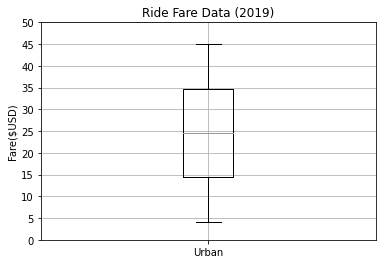

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [209]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

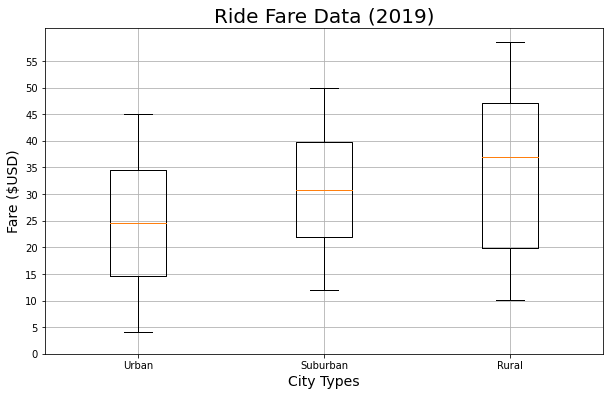

In [211]:
x_labels = ["Urban", "Suburban","Rural"]
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare ($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()

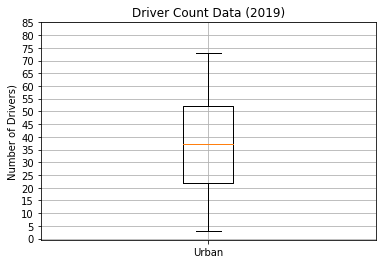

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: city_driver_count, dtype: float64

In [212]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()


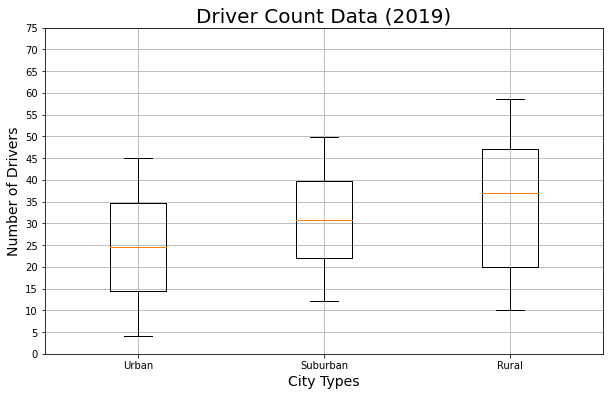

In [213]:
x_labels = ["Urban", "Suburban","Rural"]
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()

# Pie chart

In [215]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["city_type"]).sum()["fare"]
sum_fares_by_type

city_type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [216]:
pyber_data_df.head()

,city,date,fare,ride_id,city_driver_count,city_type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [218]:
# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [219]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

city_type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [220]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * pyber_data_df.groupby(["city_type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

city_type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

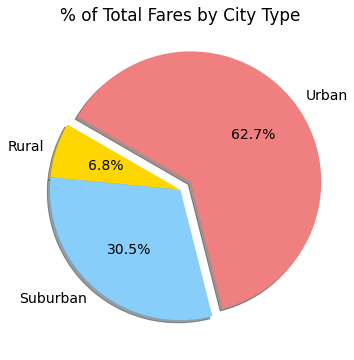

In [227]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14. se usa otra liberia
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("Resources/Fig5.png")
# Show Figure
plt.show()

# Ride percentages

In [231]:
# Aquí le estamos diciendo que agrupe por tipo de ciudad y que cuente el número de cada una en la columna ride id
pyber_data_df.groupby(['city_type']).count()['ride_id']

city_type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [234]:
# Sólo está contando los renglones para saber el número de viajes totales.
pyber_data_df["ride_id"].count()

2375

In [ ]:
# Calculate the percentage of rides for each city type.
ride_percents = 100 * pyber_data_df.groupby(["city_type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents